<a href="https://colab.research.google.com/github/zackbatch/BA820-Project/blob/main/Varun_WordCloud_BA820_project_Group_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PLAY-BY-PLAY, PLAYER-BY-PLAYER – COLLEGE BASKETBALL ANALYTICS**

**Group 12 Team Members:**
Audrey Sellers,
Jaishankar Govindaraj,
Priyanka Chaudhari,
Varun Kaza,
Zack Batchelder

#Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import gensim.downloader as api
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
#uploading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/zackbatch/BA820-Project/main/CollegeBasketballPlayers2009-2021.csv')
df

<ipython-input-2-310eda7333dd>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/zackbatch/BA820-Project/main/CollegeBasketballPlayers2009-2021.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [ ]:
dftext = pd.read_csv("https://raw.githubusercontent.com/zackbatch/BA820-Project/main/Instant%20Analysis%20Draft%3B%202020-2021.csv")

In [ ]:
#Varun
dftext

,#,Year,TEAM,PLAYER SELECTED,PICK GRADE,INSTANT ANALYSIS
0,1,2020,Minnesota,Anthony Edwards,A,It is extremely rare to see a consensus No. 1 ...
1,2,2020,Golden State,James Wiseman,A-,James Wiseman's value can only be determined t...
2,3,2020,Charlotte,LaMelo Ball,B+,Just watch him pass. Forget about the terrible...
3,4,2020,Chicago,Patrick Williams,B,"On paper, Patrick Williams possesses everythin..."
4,5,2020,Cleveland,Isaac Okoro,B,Imagine if an M-80 could play small forward. T...
...,...,...,...,...,...,...
115,56,2021,Charlotte,Scottie Lewis,B,Lewis is one of the draft's best pure athletes...
116,57,2021,Detroit,Balsa Koprivica,C,Koprivica is a high-energy center that has wor...
117,58,2021,New York,Jericho Sims,A-,The final high-level athlete out of Texas is o...
118,59,2021,Brooklyn,Raiquan Gray,B,I don't think I've ever seen a player quite li...


Plotting a Histogram of the Instant Analysis of the players

<Axes: >

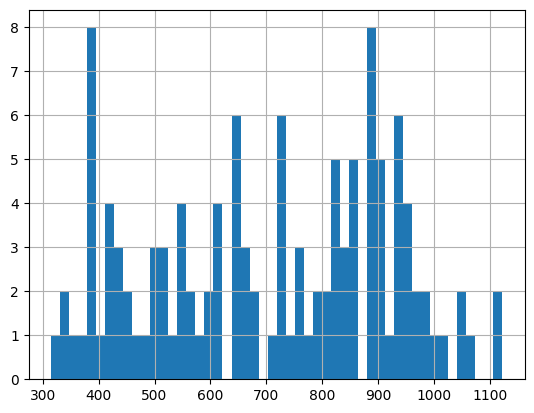

In [ ]:
dftext["INSTANT ANALYSIS"].apply(lambda x: len(x)).hist(bins=50)

We create the Clean DataFrame that we have found earlier in our notebook

In [ ]:
agg_dict2 = {**dict.fromkeys(performancecolumns, 'mean'), **dict.fromkeys(newdfplayerdetails, 'first')}
dffortext = df.groupby('Player_ID_(recurring for each year)').agg(agg_dict2).reset_index()

In [ ]:
dffortext['Pick_drafted_binary'] = dffortext['Pick_drafted'].apply(lambda x: 1 if x > 0 else 0)
dffortext['Pick_drafted_binary']

0        0
1        0
2        0
3        0
4        0
        ..
23225    0
23226    0
23227    0
23228    0
23229    0
Name: Pick_drafted_binary, Length: 23230, dtype: int64

Instant Analysis is only available for drafted players

In [ ]:
dffortextbinary = dffortext[dffortext['Pick_drafted_binary']==1]

In [ ]:
dffortextbinary

,Player_ID_(recurring for each year),Assist / Turnover ratio,Rim_shots_made,Rim-shots_attempted,Midrange_shots_made,Midrange_shots_attempted,Rim_shots %,Midrange_shots %,Dunks_made,Dunks_attempted,...,free_throw_rate,player_name,team,conference,Role/Position,year_of_college,year,Recruit_Rank,Pick_drafted,Pick_drafted_binary
18,57,1.680128,89.5,136.0,80.5,202.5,0.65785,0.40495,1.0,1.0,...,42.85,Charles Jenkins,Hofstra,CAA,Scoring PG,Jr,2010,0.0,44.0,1
28,91,0.520708,124.5,166.0,49.0,123.5,0.74985,0.39270,37.0,40.0,...,31.40,Vernon Macklin,Florida,SEC,C,Jr,2010,95.0,52.0,1
58,193,0.686239,45.0,71.0,37.0,96.0,0.63380,0.38540,5.0,5.0,...,46.10,Ryan Reid,Florida St.,ACC,C,Sr,2010,82.0,57.0,1
59,197,1.036159,73.5,107.0,76.5,219.5,0.68570,0.35065,4.0,4.5,...,34.15,Kyle Singler,Duke,ACC,Wing F,Jr,2010,99.0,33.0,1
60,198,1.626926,108.0,167.5,83.0,228.0,0.64255,0.36400,14.5,17.5,...,34.90,Nolan Smith,Duke,ACC,Combo G,Jr,2010,95.8,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22832,73518,0.736861,90.0,150.0,22.0,64.0,0.60000,0.34380,20.0,21.0,...,46.80,Day'Ron Sharpe,North Carolina,ACC,C,Fr,2021,97.4,29.0,1
22836,73524,0.473684,55.0,80.0,19.0,54.0,0.68750,0.35190,23.0,25.0,...,65.70,Isaiah Jackson,Kentucky,SEC,C,Fr,2021,94.4,22.0,1
22921,73630,0.166659,39.0,72.0,12.0,30.0,0.54170,0.40000,14.0,21.0,...,37.30,Greg Brown III,Texas,B12,PF/C,Fr,2021,98.6,43.0,1
22964,73686,0.943680,54.0,93.0,44.0,106.0,0.58060,0.41510,15.0,20.0,...,41.10,Keon Johnson,Tennessee,SEC,Wing G,Fr,2021,96.6,21.0,1


We merge our DataFrames so that we have our Text Analysis columns with the performance related columns

In [ ]:
dffortextanalysis = pd.merge(dffortextbinary, dftext, left_on='player_name', right_on='PLAYER SELECTED', how='outer')

In [ ]:
dffortextanalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 609
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Player_ID_(recurring for each year)                  582 non-null    float64
 1   Assist / Turnover ratio                              582 non-null    float64
 2   Rim_shots_made                                       582 non-null    float64
 3   Rim-shots_attempted                                  582 non-null    float64
 4   Midrange_shots_made                                  582 non-null    float64
 5   Midrange_shots_attempted                             582 non-null    float64
 6   Rim_shots %                                          582 non-null    float64
 7   Midrange_shots %                                     582 non-null    float64
 8   Dunks_made                                           582 non-null    f

We filter the DataFrame to include only the values where we can find non-nulls for INSTANT ANALYSIS

In [ ]:
dffortextanalysisnull = dffortextanalysis[dffortextanalysis['INSTANT ANALYSIS'].notna()]


In [ ]:
dffortextanalysisnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 364 to 609
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Player_ID_(recurring for each year)                  92 non-null     float64
 1   Assist / Turnover ratio                              92 non-null     float64
 2   Rim_shots_made                                       92 non-null     float64
 3   Rim-shots_attempted                                  92 non-null     float64
 4   Midrange_shots_made                                  92 non-null     float64
 5   Midrange_shots_attempted                             92 non-null     float64
 6   Rim_shots %                                          92 non-null     float64
 7   Midrange_shots %                                     92 non-null     float64
 8   Dunks_made                                           92 non-null    

We find the unique `years` that the players went to college ranges from 2017 to 2021. This tells us that players are not necessarily drafted in the years they go to college.

In [ ]:
dffortextanalysisnull['year'].unique()

array([2017., 2018., 2019., 2020., 2021.,   nan])

We filter the players without textual analysis to find if we missed any. Players are drafted from college, abroad, or high school. Any player not found in the dataset is assumed to be outside the scope of this project.

In [ ]:
nulls = dffortextanalysisnull[dffortextanalysisnull['Pick_drafted'].isna()]

In [ ]:
nulls = pd.DataFrame(nulls['PLAYER SELECTED'].unique())

In [ ]:
nulls

,0
0,LaMelo Ball
1,Killian Hayes
2,Deni Avdija
3,Kira Lewis
4,Aleksej Pokusevski
5,Leandro Bolmaro
6,RJ Hampton
7,Vernon Carey
8,Theo Maledon
9,Vit Krejci


In [ ]:
selected_players = [
    'LaMelo Ball', 'Killian Hayes', 'Deni Avdija', 'Kira Lewis', 'Aleksej Pokusevski',
    'Leandro Bolmaro', 'RJ Hampton', 'Vernon Carey', 'Theo Maledon', 'Vit Krejci',
    'Jahmius Ramsey', 'Marko Simonovic', 'Yam Madar', 'Kenyon Martin Jr.', 'Jay Scrubb',
    'Jalen Green', 'Josh Giddey', 'Jonathan Kuminga', 'Alperen Sengun', 'Trey Murphy',
    'Usman Garuba', 'Isaiah Todd', 'Rokas Jokubaitis', 'Greg Brown', 'Juhann Begarin',
    'BJ Boston', 'Balsa Koprivica', 'Georgios Kalaitzakis'
]

filtered_df = dffortext[dffortext['player_name'].isin(selected_players)]
filtered_df

,Player_ID_(recurring for each year),Assist / Turnover ratio,Rim_shots_made,Rim-shots_attempted,Midrange_shots_made,Midrange_shots_attempted,Rim_shots %,Midrange_shots %,Dunks_made,Dunks_attempted,...,free_throw_rate,player_name,team,conference,Role/Position,year_of_college,year,Recruit_Rank,Pick_drafted,Pick_drafted_binary
1004,3111,0.504553,21.00,35.50,9.50,39.50,0.5631,0.2404,2.0,3.5,...,27.35,Greg Brown,Navy,Pat,Wing G,Jr,2010,0.0,NaN,0
8816,27563,1.616722,35.75,66.75,22.75,65.25,0.5356,0.3349,5.5,6.5,...,28.25,Greg Brown,St. Francis PA,NEC,Scoring PG,Fr,2013,0.0,NaN,0
21692,72082,0.516565,58.50,81.50,10.50,28.50,0.7376,0.3816,30.5,32.0,...,46.80,Balsa Koprivica,Florida St.,ACC,C,Fr,2020,84.6,NaN,0


We Find 'Balsa Koprivica' to have not have been marked as 'Drafted'. This should be amended.

In [ ]:
dffortext[dffortext['player_name']=='Balsa Koprivica']

,Player_ID_(recurring for each year),Assist / Turnover ratio,Rim_shots_made,Rim-shots_attempted,Midrange_shots_made,Midrange_shots_attempted,Rim_shots %,Midrange_shots %,Dunks_made,Dunks_attempted,...,free_throw_rate,player_name,team,conference,Role/Position,year_of_college,year,Recruit_Rank,Pick_drafted,Pick_drafted_binary
21692,72082,0.516565,58.5,81.5,10.5,28.5,0.7376,0.3816,30.5,32.0,...,46.8,Balsa Koprivica,Florida St.,ACC,C,Fr,2020,84.6,NaN,0


We use the index value of Balsa Koprivica to change his `Pick_drafted` value

In [ ]:
dffortext.loc[21692, 'Pick_drafted'] = 1

We create a separate DataFrame called Balsa which we will use later

In [ ]:
Balsa = dffortext[dffortext['player_name']=='Balsa Koprivica']
Balsa = pd.merge(Balsa, dftext, left_on='player_name', right_on='PLAYER SELECTED', how='outer')
Balsa = Balsa [Balsa['PLAYER SELECTED']=='Balsa Koprivica']
Balsa
Balsa = Balsa.drop(columns='Pick_drafted')

We filter the DataFrame

In [ ]:
dffortextanalysisnull = dffortextanalysisnull[dffortextanalysisnull['Player_ID_(recurring for each year)'].notna()]

We concatanate `dffortextanalysisnull` and `Balsa`

In [ ]:
finaltext = pd.concat([dffortextanalysisnull, Balsa])

#Further Cleaning of the DataFrame
finaltext = finaltext.drop(columns=['year','year_of_college','#','player_name'])

We quickly create a separate DataFrame to be used for our Sentiment Analysis

In [ ]:
finaltextsentiment = finaltext.copy()

We drop columns that could causes confusion or are repeated in values

We Tokenize our Instant Analysis and store it in a column `analysisprocessed`

In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

finaltext["analysisprocessed"] = finaltext["INSTANT ANALYSIS"].str.lower()
finaltext["analysisprocessed"] = finaltext["INSTANT ANALYSIS"].replace('<br />', ' ', regex=True)
finaltext["analysisprocessed"] = finaltext["INSTANT ANALYSIS"].replace('[^\w\d\s]', ' ', regex=True)


tokenized_reviews = [word_tokenize(review) for review in finaltext["analysisprocessed"]]

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
for indx, tokens in enumerate(tokenized_reviews):
  tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]


finaltext["analysisprocessed"] = tokenized_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


We return to performing a **K-Means** clustering to see what performance metrics the drafted players have in common.

In [ ]:
performance_columns = ['Assist / Turnover ratio', 'Rim_shots_made', 'Rim-shots_attempted', 'Midrange_shots_made', 'Midrange_shots_attempted', 'Rim_shots %', 'Midrange_shots %', 'Dunks_made', 'Dunks_attempted', 'Defensive_rating', 'Adjusted_defensive_rating', 'Stops', 'Box plus/minus', 'Offensive box plus/minus', 'Defensive box plus/minus', 'gbpm', 'Minutes_played', 'Offensive_gbpm', 'Defensive_gbpm', 'Offensive_rebounds', 'Defensive_rebounds', 'Total_rebounds', 'Assists', 'Steals', 'Blocks', 'Points', 'Pointers_over_replacement_per_adjusted_game', 'Adjusted_offensive_efficiency', 'pfr', 'games_played', 'min_per', 'offensive_rating', 'usage', 'effective_field_goal_%', 'true_shooting_%', 'offensive_rebound_%', 'defensive_rebound_%', 'assist_%', 'turnover_%', 'free_throws_made', 'free_throws_attempted', 'free_throws_%', '2-pointers_made', '2-pointers_attempted', '2-pointers_%', '3-pointers_made', '3-pointers_attempted', '3-pointers_%', 'Block_%', 'Steal_%', 'free_throw_rate']


# Select the relevant columns for clustering
cluster_data = finaltext[performance_columns]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

Finding the optimal number of clusters

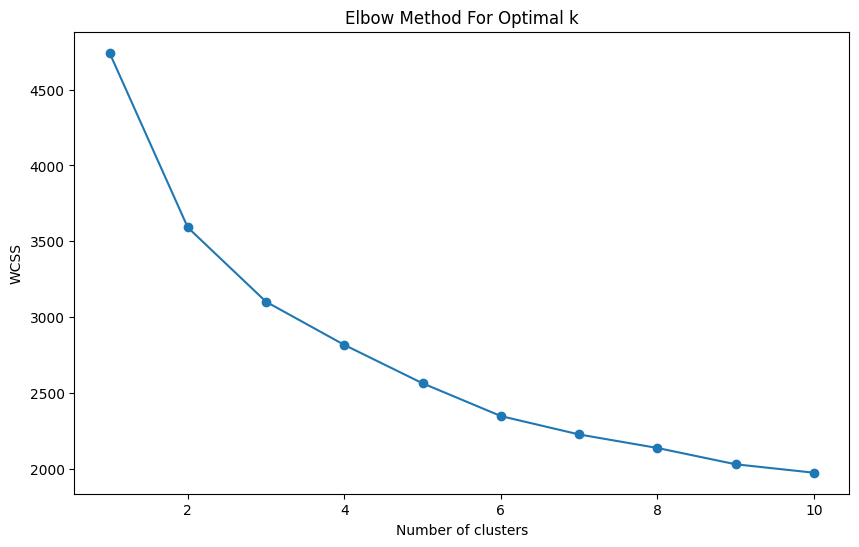

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_data_scaled)
    wcss.append(kmeans.inertia_)

#Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Finding the features that explain the most variance in our data

In [ ]:

cov_matrix = np.cov(cluster_data_scaled, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

n_top_features = 3
top_feature_indices = np.abs(sorted_eigenvectors[:, :n_top_features]).argmax(axis=0)
top_features = cluster_data.columns[top_feature_indices]

print("Top Features Explaining the Most Variance:")
print(top_features)


Top Features Explaining the Most Variance:
Index(['offensive_rebound_%', 'Pointers_over_replacement_per_adjusted_game',
       'Offensive box plus/minus'],
      dtype='object')


We see that players cluster by

'offensive_rebound_%'

'Pointers_over_replacement_per_adjusted_game'

'Offensive box plus/minus'

We will work to create a **K-Means** clustering based on the variables above

In [ ]:
features = ['offensive_rebound_%', 'Pointers_over_replacement_per_adjusted_game',
       'Offensive box plus/minus']

scaler = StandardScaler()
new_dataset_scaled = scaler.fit_transform(cluster_data[features])

np.random.seed(42)
initial_centroids_indices = np.random.choice(new_dataset_scaled.shape[0], size=4, replace=False)
initial_centroids = new_dataset_scaled[initial_centroids_indices]

kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=42)
kmeans.fit(new_dataset_scaled)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

cluster_data['Cluster Labels'] = cluster_labels

<ipython-input-111-d85981902e38>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We first visualize our clusters to see how they are represented in a 3D plot

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.scatter_3d(cluster_data, x = 'offensive_rebound_%', y = 'Pointers_over_replacement_per_adjusted_game', z = 'Offensive box plus/minus', color='Cluster Labels')
fig.update_traces(marker_size = 3)

We pip install our wordcloud package

In [ ]:
pip install wordcloud

We create a wordcloud of our clusters to see which words appear the most frequently in our clusters

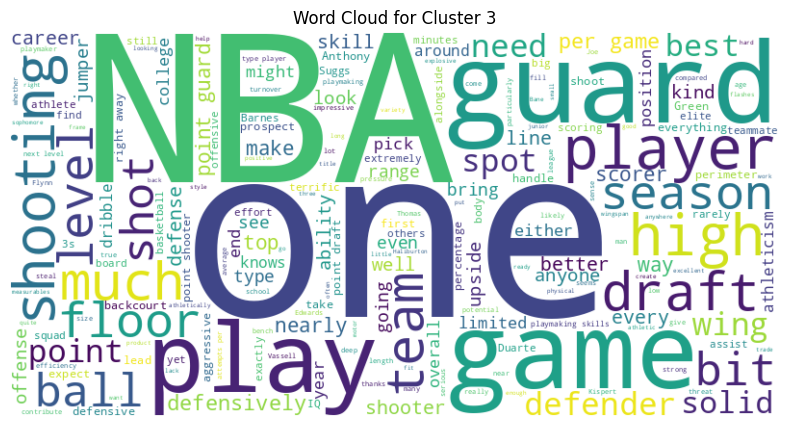

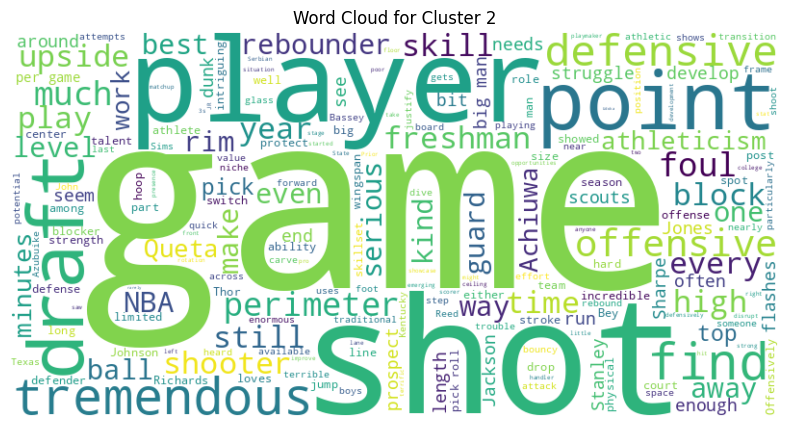

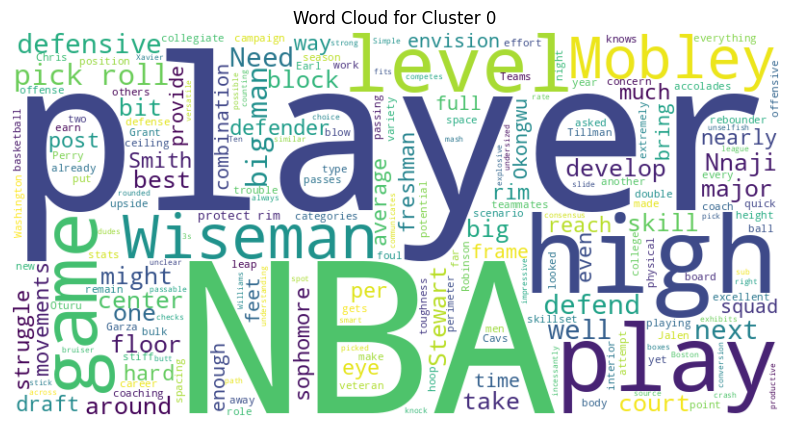

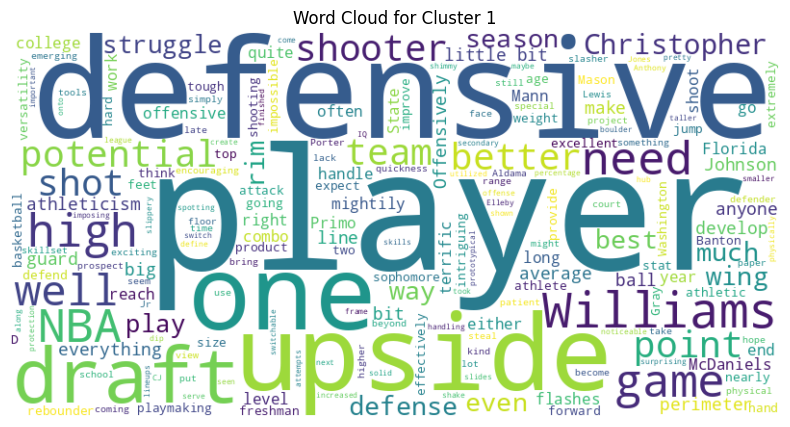

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster_label in cluster_data['Cluster Labels'].unique():
    cluster_subset = cluster_data[cluster_data['Cluster Labels'] == cluster_label]

    # Concatenate all tokens in the cluster
    all_tokens = [word for tokens in finaltext.loc[cluster_subset.index, 'analysisprocessed'] for word in tokens]
    cluster_text = ' '.join(all_tokens)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.axis('off')
    plt.show()


We can see that Cluster 3 has words such as guard and one appearing at the forefront. This could reflect the kind of game they play or the types of points they score.

Cluster 2 has words such as tremendous and Shot appearing more often. This descriptor and playing action could summarize the players in this cluster.

Cluster 0 has words such as High and Level appearing more often. This could be talking about the potential that the player has and the quality of their game.

Cluster 1 has words such as Defensive and potential appearing more often. This is interesting as we know that offensive stats explain the most variance amongst drafted players.

We see the words defensive, potential, level, and shooting appearing in all word clouds. This is an indicator of the traits that scouts seek and the language they use.